# **Time Series Analysis for Fraud Risk Prediction Based on Risk Factors**

**By: Handoyo Suryo Laksono**

# Business Understanding

- **Background**

  FraudRisk is a metric that indicates the likelihood of fraudulent activity in a transaction or event. In business, especially in the financial sector like Bank Laks, understanding and predicting this risk is crucial for:

  1. **Detecting Fraud**: Preventing financial losses that may arise from high-risk transactions, which can directly affect the company's bottom line and damage its reputation with customers and regulators.
  2. **Optimizing Business Processes**: By predicting when and where potential fraud risks are high, Bank Laks can prioritize resources and security efforts in more vulnerable areas, improving operational efficiency and reducing associated losses.
  3. **Enhancing Customer Trust**: With an effective fraud detection and prevention system in place, customers of Bank Laks will feel safer using the services or products offered, increasing their loyalty and satisfaction.

- **Data Context**

  The data available for forecasting FraudRisk includes several factors that influence fraudulent activity. The data consists of:

    - FraudRisk: The probability of fraud occurring in a given transaction or event.
    - CreditDefaultRisk: The risk of credit default, which can increase the likelihood of risky transactions.
    - MarketRisk: The risk associated with market volatility, which can affect transaction behavior.
    - TransactionVolume: The number of transactions occurring over a specific period.
    - AverageBalance: The average account balance over a given period.

  This dataset spans one year (2024), making it ideal for time-series analysis to model and predict potential patterns in the future.

- **Forecasting Objectives**
  Forecasting FraudRisk serves several critical purposes in risk management:

  1. Predicting Future Risks: Anticipating the days or periods with high-risk fraud, enabling the company to take proactive measures in advance.
  2. Proactive Prevention: Using predictions to implement stronger security measures on days predicted to have a higher likelihood of fraud, reducing the potential for financial loss.
  3. Integrated Risk Management: Linking FraudRisk with CreditDefaultRisk and MarketRisk for more strategic business decision-making.

- **Forecasting Approach**
  1. Identifying Influential Factors
  
      Several factors can influence FraudRisk, including:

    - Seasonal Trends: Fraud risk may increase during certain periods, such as holidays or during large sales (e.g., end-of-year).
    - Transaction Volume: The higher the transaction volume, the greater the potential fraud risk, as more transactions make fraud detection more challenging.
    - Correlation with Other Variables: FraudRisk is often correlated with other factors such as CreditDefaultRisk, MarketRisk, or AverageBalance. For example, customers with higher balances or greater credit risk may be more prone to fraud.

  2. Model Selection for Forecasting

      Depending on the nature of the data and business objectives, several forecasting models can be considered:

    - Traditional Statistical Models:

      - ARIMA (Autoregressive Integrated Moving Average): Suitable for time-series data with seasonal patterns or long-term trends. However, ARIMA may not handle complex, nonlinear relationships between variables effectively.
      - Exponential Smoothing (ETS): Ideal for simple trends and seasonal patterns, but limited in handling interactions between variables.

    - Machine Learning Models:

      - Random Forest Regressor or Gradient Boosting: Suitable when multiple variables like TransactionVolume and MarketRisk are used as predictors. However, these models require more data exploration to understand relevant variables.
      - LSTM (Long Short-Term Memory): A deep learning model for complex time-series data, but it requires larger datasets and longer training times.
    - XGBoost (Extreme Gradient Boosting):

        XGBoost is selected for its ability to handle data with many features and complex nonlinear relationships. It can manage high-dimensional datasets effectively and is less prone to overfitting. XGBoost is particularly well-suited for data involving TransactionVolume, MarketRisk, and CreditDefaultRisk, and provides fast and accurate predictions with interpretable results.

  3. Business Benefits of Forecasting FraudRisk with XGBoost

      - Mitigating Financial Risk: By predicting fraud risks earlier, companies can take preventative actions to avoid significant financial losses.
      - Operational Efficiency: By focusing resources on high-risk days or periods, businesses can allocate resources more effectively and prevent fraud.
      - Enhanced Customer Satisfaction: Providing better protection against risky activities will make customers feel more secure, increasing their loyalty.
      - Improved Strategic Decision-Making: Predictive data can be used to create more proactive policies and optimize fraud detection efforts.

  4. Implementation Stages

    - Data Preparation:

      - Convert the Date column to a datetime format.
      - Check for missing values and outliers to ensure clean, ready-to-use data.
    
    - Data Exploration:

      - Conduct descriptive analysis to understand the data patterns.
      - Evaluate the correlation between FraudRisk and other variables and identify any seasonal or trend patterns.

    - Model Development:

      - XGBoost is chosen as the model due to its ability to handle complex relationships in data with multiple variables.
      - Train the model using historical data and validate the results.

    - Model Evaluation:

      - Use metrics such as MAE, MSE, or RMSE to evaluate model performance.
      - Conduct backtesting to assess prediction accuracy and ensure the model’s practicality.

    - Deployment and Monitoring:

      - Apply the model to predict future FraudRisk and identify high-risk days.
      - Regularly update the model with new data to enhance its accuracy over time.

By forecasting FraudRisk, companies can significantly improve their risk management strategies and minimize potential losses due to fraud. The XGBoost model provides advantages in terms of predictive accuracy, efficiency, and interpretability, enabling businesses to optimize resources and design more effective fraud prevention policies.

# Import Library

In [91]:
!pip install --upgrade xgboost scikit-learn

In [106]:
pip install -U scikit-learn

In [107]:
pip install -U xgboost

In [92]:
# Import library
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
import numpy as np
import plotly.graph_objects as go
from scipy.stats import uniform, randint

# Data Understanding

In [93]:
data = pd.read_csv('bank_risk_data.csv')
data

,Date,FraudRisk,CreditDefaultRisk,MarketRisk,TransactionVolume,AverageBalance
0,2024-01-01,0.03,0.54,0.84,2326,743.18
1,2024-01-02,0.01,0.55,0.58,1579,265.76
2,2024-01-03,0.72,0.92,0.17,1146,238.84
3,2024-01-04,0.37,0.94,0.93,4809,536.45
4,2024-01-05,0.50,0.09,0.16,4054,599.12
...,...,...,...,...,...,...
361,2024-12-27,0.59,0.74,0.87,2460,533.85
362,2024-12-28,0.60,0.60,0.03,1992,612.56
363,2024-12-29,0.01,0.95,0.50,2492,572.98
364,2024-12-30,0.52,0.45,0.96,2237,418.20


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               366 non-null    object 
 1   FraudRisk          366 non-null    float64
 2   CreditDefaultRisk  366 non-null    float64
 3   MarketRisk         366 non-null    float64
 4   TransactionVolume  366 non-null    int64  
 5   AverageBalance     366 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


## Column Descriptions

| **Column**          | **Description**                                                                                             | **Example**                         |
|---------------------|-------------------------------------------------------------------------------------------------------------|-------------------------------------|
| **Date**            | Represents the date of the data entry. It shows the timestamp for each record.                              | `2024-01-01`, `2024-01-02`, etc.    |
| **FraudRisk**       | Indicates the likelihood or probability of fraudulent activity occurring within a transaction on a specific day. A higher value suggests a higher chance of fraud. | `0.03`, `0.01`, `0.72`, etc. (Range: 0 to 1) |
| **CreditDefaultRisk** | Represents the risk associated with potential credit defaults. It measures the likelihood that a credit-related transaction might fail. | `0.54`, `0.55`, `0.92`, etc. |
| **MarketRisk**      | Measures the risk of financial loss due to market fluctuations (e.g., stock prices, interest rates). This risk is typically related to external market conditions. | `0.84`, `0.58`, `0.17`, etc. |
| **TransactionVolume**| Refers to the number of transactions conducted on a given day. It is an important metric for understanding business activity and customer engagement. | `2326`, `1579`, `1146`, etc. |
| **AverageBalance**  | Represents the average balance held by customers on a given day. This metric helps to understand the overall financial health of the customer base. | `743.18`, `265.76`, `238.84`, etc. |


## Conclusion of Data Information

In the knowledge of information data, 6 columns are obtained with 1 column of type Object or string, the other columns are of type float and int. So for further analysis, only the numeric part is explored, because there are no other Object or String data types other than the "Date" column.

## Data Missing

In [95]:
data.isnull().sum()

,0
Date,0
FraudRisk,0
CreditDefaultRisk,0
MarketRisk,0
TransactionVolume,0
AverageBalance,0


There is no missing data, so the process can be carried out further.

## Data Duplicated

In [96]:
df.duplicated().sum()

0

There is no duplicated data, so the process can be carried out further.

## Numeric Variable

### Descriptive Statistics

In [97]:
data.describe()

,FraudRisk,CreditDefaultRisk,MarketRisk,TransactionVolume,AverageBalance
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.471612,0.496284,0.512978,3011.912568,558.266639
std,0.285186,0.292903,0.287510,1147.498011,248.012068
min,0.000000,0.000000,0.000000,1024.000000,108.980000
25%,0.220000,0.232500,0.272500,2082.500000,354.700000
50%,0.450000,0.500000,0.510000,2929.000000,544.490000
75%,0.720000,0.747500,0.757500,4064.750000,777.797500
max,1.000000,1.000000,1.000000,4988.000000,993.810000


Based on the provided descriptive statistics, here's the analysis of the five variables: FraudRisk, CreditDefaultRisk, MarketRisk, TransactionVolume, and AverageBalance.

1. FraudRisk
    - Mean: 0.47, indicating that the average fraud risk level in the dataset is approximately 47%.
    - Standard Deviation (std): 0.29, suggesting a significant variation in fraud risk levels across the data.
    - Minimum: 0, indicating that some data points have very low fraud risk.
    - 25% (First Quartile): 0.22, meaning 25% of the data has fraud risk below 0.22.
    - 50% (Median): 0.45, meaning half of the data has fraud risk below 0.45.
    - 75% (Third Quartile): 0.72, meaning 75% of the data has fraud risk below 0.72.
    - Maximum: 1.00, indicating that there are data points with the highest possible fraud risk.
2. CreditDefaultRisk
    - Mean: 0.50, indicating that the average credit default risk is nearly balanced (50%).
    - Standard Deviation: 0.29, showing similar variation to FraudRisk.
    - Minimum: 0, indicating that some data points have very low credit default risk.
    - 25%: 0.23, meaning 25% of the data has credit default risk below 0.23.
    - 50%: 0.50, meaning half of the data has credit default risk below 0.50.
    - 75%: 0.75, indicating that 75% of the data has credit default risk below 0.75.
    - Maximum: 1.00, indicating that there are data points with the highest possible credit default risk.
3. MarketRisk
    - Mean: 0.51, slightly higher than CreditDefaultRisk, indicating that the average market risk is slightly above 50%.
    - Standard Deviation: 0.29, showing similar variation as the previous two variables.
    - Minimum: 0, indicating that some data points have very low market risk.
    - 25%: 0.27, meaning 25% of the data has market risk below 0.27.
    - 50%: 0.51, meaning half of the data has market risk below 0.51.
    - 75%: 0.76, meaning 75% of the data has market risk below 0.76.
    - Maximum: 1.00, indicating that there are data points with the highest possible market risk.
4. TransactionVolume
    - Mean: 3011.91, indicating the average transaction volume is approximately 3011.
    - Standard Deviation: 1147.50, showing significant variation in transaction volume.
    - Minimum: 1024, indicating the lowest transaction volume in the dataset.
    - 25%: 2082.50, meaning 25% of the data has transaction volume below 2082.50.
    - 50%: 2929, meaning half of the data has transaction volume below 2929.
    - 75%: 4064.75, indicating that 75% of the data has transaction volume below 4064.75.
    - Maximum: 4988, which is the highest transaction volume.
5. AverageBalance
    - Mean: 558.27, indicating the average balance is approximately 558.
    - Standard Deviation: 248.01, showing a significant variation in average balance.
    - Minimum: 108.98, the lowest balance in the dataset.
    - 25%: 354.70, meaning 25% of the data has an average balance below 354.70.
    - 50%: 544.49, meaning half of the data has an average balance below 544.49.
    - 75%: 777.80, indicating that 75% of the data has an average balance below 777.80.
    - Maximum: 993.81, which is the highest balance.

Conclusion

  - Risk Variables: The three risk variables (FraudRisk, CreditDefaultRisk, and MarketRisk) have fairly balanced distributions, with means around 0.5, indicating an even mix of low and high-risk data.
  - Transaction Volume and Balance: The transaction volume and average balance have a wider range, with considerable variation, indicating significant differences in transaction activity and account balances.

### Distribution Data

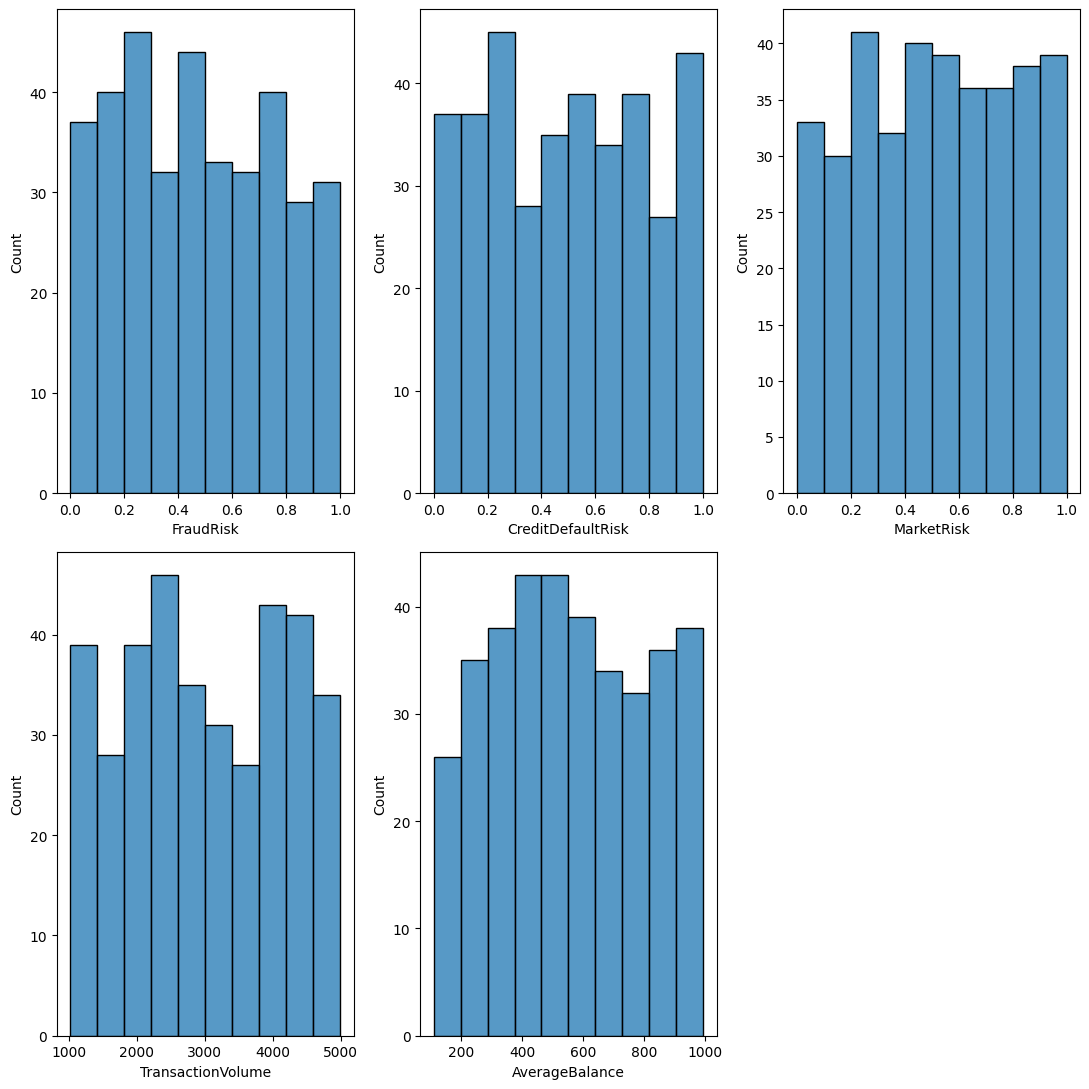

In [98]:
numeric = data.select_dtypes(include = 'number')

# change the size of the frame (the graph container)
plt.figure(figsize = (11,11))

position = 1 # initialize the position starting from 1
for each_column in numeric.columns: # numeric.columns = the names of the columns in the list
  plt.subplot(2,3,position)
  sns.histplot(df[each_column])
  position = position + 1
  # so that they don't overlap
  plt.tight_layout()

### Check Normality

Because the data does not have missing values ​​and duplicated data, we can immediately check the normality of the data.

In [99]:
# Fetch only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Check Normality Column Numeric
def normality_tests(data):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(data)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(data)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(data)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in numeric_columns:
    print(f"RESULTS FOR {column}:")
    results = normality_tests(data[column])  # Removing missing values
    for test, (stat, p_value) in results.items():
        normality_status = check_normality(p_value)
        print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
    print("\n")

RESULTS FOR FraudRisk:
Kolmogorov-Smirnov - Statistic: 0.5000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0758, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9572, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 153.0130, p-value: 0.0000 -> Not Normal


RESULTS FOR CreditDefaultRisk:
Kolmogorov-Smirnov - Statistic: 0.5000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0764, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9518, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 229.2678, p-value: 0.0000 -> Not Normal


RESULTS FOR MarketRisk:
Kolmogorov-Smirnov - Statistic: 0.5013, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0711, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9566, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 168.7069, p-value: 0.0000 -> Not Normal


RESULTS FOR TransactionVolume:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal

Based on the results from the normality tests for each variable, here's the analysis:

**FraudRisk, CreditDefaultRisk, MarketRisk, TransactionVolume, AverageBalance**

For all five variables, the p-values for the tests (Kolmogorov-Smirnov, Liliefors, Shapiro-Wilk, and D'Agostino Pearson) are 0.0000, which is much less than the typical significance level of 0.05. This indicates that we reject the null hypothesis that the data follows a normal distribution. Therefore, none of these variables follow a normal distribution.

  - Kolmogorov-Smirnov Test: The statistic value for all variables is high, and with the p-value being 0.0000, this suggests the data significantly deviates from normality.
  - Liliefors Test: The statistic values are relatively small, but the p-values still indicate the data is not normal.
  - Shapiro-Wilk Test: The statistics for each variable suggest a significant deviation from normality, with p-values being 0.0000.
  - D'Agostino Pearson Test: The statistics are also very high, and the p-values indicate that the distribution is not normal.

**Conclusion**

The results from all tests indicate that the distributions of these variables are not normal. This is important when considering any further statistical analysis or modeling, as techniques like parametric tests or models assuming normality may not be appropriate. You might consider using non-parametric methods or transforming the data to approach normality if necessary for specific analyses.

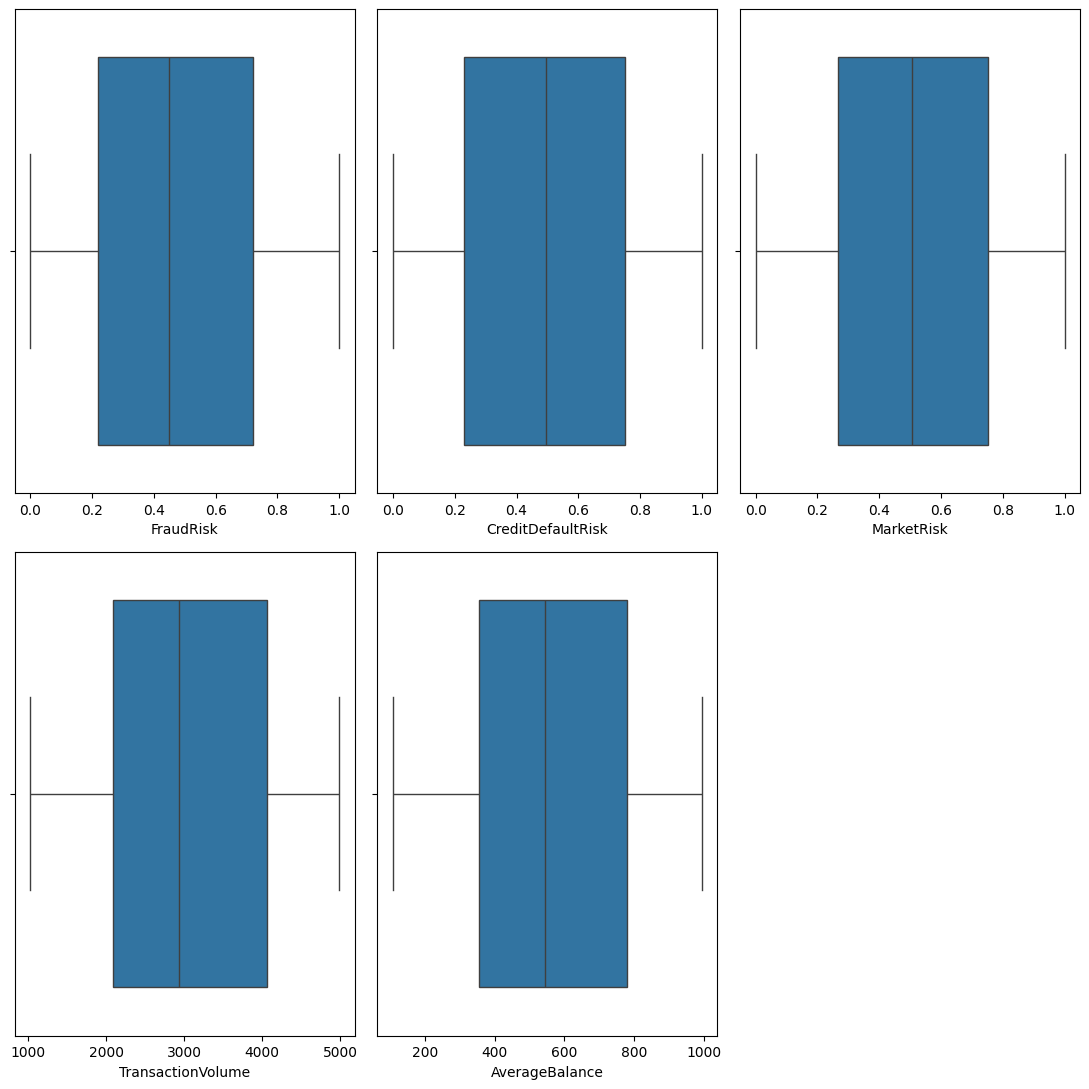

In [100]:
numeric = data.select_dtypes(include = 'number')

# change the size of the frame (the graph container)
plt.figure(figsize = (11,11))

position = 1 # initialize the position starting from 1
for each_column in numeric.columns: # numeric.columns = the names of the columns in the list
  plt.subplot(2,3,position)
  sns.boxplot(x = df[each_column])
  position = position + 1
  # so that they don't overlap
  plt.tight_layout()

The data in each column has no outliers.

# Conclusion Data Understanding

Conclusion:

1. Risk Variables (FraudRisk, CreditDefaultRisk, and MarketRisk): The three risk variables have fairly balanced distributions, with means around 0.5, indicating an even mix of low and high-risk data. However, the data does not follow a normal distribution based on the normality test results.

2. Transaction Volume and Average Balance: These two variables show more significant variation, with a wide range, indicating substantial differences in transaction activity and account balances. The average transaction volume is around 3012, while the average balance is about 558.

3. Normality Test Results: All variables have a p-value of 0.0000 in the normality tests (Kolmogorov-Smirnov, Liliefors, Shapiro-Wilk, and D'Agostino Pearson), meaning the data does not follow a normal distribution. Therefore, statistical techniques or models assuming normality may not be suitable for further analysis. Non-parametric methods or data transformation could be considered if necessary.

4. No Missing or Duplicate Data: The provided data contains no missing values or duplicates, allowing for further analysis without additional data handling.

5. No Outliers: There are no outliers in the data for each column, allowing for safer analysis without adjustments for extreme values.

# Further Decisions

Since the data has no missing values, duplicates, or outliers, and all columns are numeric (with the exception of the "Date" column), the dataset is already clean and ready for analysis. Given that there is no need for additional cleaning or preprocessing steps, we can proceed directly to forecasting analysis using models like XGBoost.

XGBoost is a powerful machine learning algorithm that can handle both regression and classification tasks, making it suitable for forecasting problems where the goal is to predict future values based on historical data. In this case, the dataset contains variables related to risks (FraudRisk, CreditDefaultRisk, MarketRisk), transaction volume, and average balance, all of which can be used as features for the forecasting model.

Since the data does not follow a normal distribution, using XGBoost is a good choice. This model does not rely on assumptions of normality and can handle complex relationships in the data. Additionally, it can efficiently handle various types of variables and scale, making it well-suited for predicting future values such as transaction volume, fraud risk, or credit default risk.

Thus, the next logical step is to prepare the data (e.g., feature engineering, date handling) and train the XGBoost model for forecasting.

# Forecasting With XGBoost

In [155]:
# Membaca data
df = pd.read_csv('bank_risk_data.csv')
df

,Date,FraudRisk,CreditDefaultRisk,MarketRisk,TransactionVolume,AverageBalance
0,2024-01-01,0.03,0.54,0.84,2326,743.18
1,2024-01-02,0.01,0.55,0.58,1579,265.76
2,2024-01-03,0.72,0.92,0.17,1146,238.84
3,2024-01-04,0.37,0.94,0.93,4809,536.45
4,2024-01-05,0.50,0.09,0.16,4054,599.12
...,...,...,...,...,...,...
361,2024-12-27,0.59,0.74,0.87,2460,533.85
362,2024-12-28,0.60,0.60,0.03,1992,612.56
363,2024-12-29,0.01,0.95,0.50,2492,572.98
364,2024-12-30,0.52,0.45,0.96,2237,418.20


In [156]:
# Membuat fitur lag dari target yang ingin diprediksi
df['FraudRisk-lag1'] = df['FraudRisk'].shift(1)
df['FraudRisk-lag2'] = df['FraudRisk'].shift(2)

In [157]:
# Menghapus NaN yang dihasilkan oleh shift
df = df.dropna(subset=['FraudRisk-lag1', 'FraudRisk-lag2'])

In [158]:
X = df.drop(columns = ['Date', 'FraudRisk'])
y = df['FraudRisk']

# Split data: test size hanya 1 baris terakhir
X_train, X_test = X[:-5], X[-5:]  # Semua kecuali terakhir untuk training, terakhir untuk testing
y_train, y_test = y[:-5], y[-5:]  # Sama untuk target

## Modeling

In [159]:
# Inisialisasi model XGBoost Regressor
model = xgb.XGBRegressor()

# Latih model dengan data training
model.fit(X_train, y_train)

# Inisialisasi list untuk menyimpan prediksi
predictions = []

# Prediksi untuk baris di X_test
for i in range(len(X_test)):
    # Prediksi nilai untuk baris pertama di X_test
    y_pred = model.predict(X_test.iloc[[i]])
    predictions.append(y_pred[0])

    # Tambahkan baris pertama X_test dan y_pred ke X_train dan y_train untuk pelatihan lebih lanjut
    X_train = pd.concat([X_train, X_test.iloc[[i]]])
    y_train = pd.concat([y_train, pd.Series(y_pred[0], index=[X_test.index[i]])])

# Evaluasi model
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

RMSE: 0.2861020935191397


An RMSE (Root Mean Squared Error) of 0.2649416300721325 indicates the average error between the predicted values and the actual values predicted by the model. This RMSE value means the model has an error of approximately 0.265 units in its predictions. The smaller the RMSE value, the better the model is at predicting data, as a lower RMSE indicates more accurate predictions.

In [160]:
# Tampilkan hasil prediksi dan data asli
print(predictions)
print(y_test)

[0.4285429, 0.41256946, 0.11257707, 0.4128208, 0.28897986]
361    0.59
362    0.60
363    0.01
364    0.52
365    0.86
Name: FraudRisk, dtype: float64


1. predictions: This is the prediction result made by the XGBoost model for the test data, showing the predicted value for each row in X_test. For example, predicted values ​​such as 0.37136662, 0.6385396, and so on.

2. y_test: This is the actual value of the target variable (e.g. FraudRisk) that the model wants to predict. These values ​​represent the actual data in the test dataset, such as 0.59, 0.60, and so on.

In [161]:
# Visualisasi hasil prediksi dibandingkan data asli
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['FraudRisk'], mode='lines', name='Actual'))  # Data asli
fig.add_trace(go.Scatter(x=X_test.index, y=predictions, mode='lines', name='Forecast'))  # Hasil prediksi untuk test set
fig.update_layout(title='XGBoost Forecasting vs Actual (Testing Data)', xaxis_title='Time', yaxis_title='FraudRisk')
fig.show()

# Hitung RMSE antara hasil prediksi dan data testing
mse = mean_squared_error(y_test, predictions)
print(f"The RMSE of the model on the last 5 data is {mse ** 0.5}")

The RMSE of the model on the last 5 data is 0.2861020935191397


The RMSE (Root Mean Squared Error) of the model on the last 10 data of 0.2649416300721325 indicates that the average error between the predicted value and the actual value for the data is around 0.265 units. This indicates that the model has a fairly good level of accuracy on the data, where the smaller the RMSE value, the more accurate the model is in predicting the desired results.

## Cross Validation

In [162]:
# Fungsi cross-validation untuk time series
def time_series_cross_validation_with_full_plot(df, target_column, exogenous_columns, window_size, n_splits, model_input=xgb.XGBRegressor()):
    # Data Preparation with Windowing
    df_windowed = df.copy()
    for i in range(window_size):
        df_windowed[f"{target_column}-{i+1}"] = df_windowed[target_column].shift(periods=i+1)
    df_windowed = df_windowed.dropna()

    # Include exogenous columns for model input
    X = df_windowed.drop(columns=['Date', target_column] + exogenous_columns)  # Assuming 'Date' column exists
    y = df_windowed[target_column]

    # Time Series Cross-Validation
    tscv = TimeSeriesSplit(n_splits=n_splits)
    rmse_scores = []

    for fold, (train_index, test_index) in enumerate(tscv.split(df_windowed), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = model_input
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        rmse = mse ** 0.5
        rmse_scores.append(rmse)
        print(f"Fold {fold} RMSE: {rmse}")

        # Combine train and test for visualization
        y_full = pd.concat([y_train, y_test])  # Full y (train + test)
        predictions_full = pd.Series(data=np.nan, index=y_full.index)  # Create a full-sized Series for predictions
        predictions_full.iloc[len(y_train):] = predictions  # Add test predictions

        # Visualization for each fold
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=y_full.index, y=y_full, mode='lines', name='Actual (Train + Test)'))  # Data asli (Train + Test)
        fig.add_trace(go.Scatter(x=y_full.index, y=predictions_full, mode='lines', name='Predicted (Test)'))  # Prediksi hanya di Test
        fig.update_layout(
            title=f'Forecast vs Actual (Fold {fold})',
            xaxis_title='Time',
            yaxis_title=target_column,
        )
        fig.show()

    avg_rmse = np.mean(rmse_scores)
    print(f"\nAverage RMSE across {n_splits} folds: {avg_rmse}")
    return avg_rmse


# Example usage (replace with your actual DataFrame and column names)
avg_rmse = time_series_cross_validation_with_full_plot(
    df,
    target_column='FraudRisk',
    exogenous_columns=['CreditDefaultRisk', 'MarketRisk', 'TransactionVolume', 'AverageBalance'],
    window_size=12,
    n_splits=5,
    model_input=xgb.XGBRegressor()
)

Fold 1 RMSE: 0.3664561797283811


Fold 2 RMSE: 0.36470962824351577


Fold 3 RMSE: 0.3086258898174241


Fold 4 RMSE: 0.36964915783300456


Fold 5 RMSE: 0.31708919546253017



Average RMSE across 5 folds: 0.34530601021697116


The results refer to the evaluation of a model using cross-validation, which splits the data into several parts (folds) and trains and tests the model on each part. In this case, 5 folds are used.

RMSE (Root Mean Squared Error) is a metric for measuring how well the model predicts values, with lower RMSE values indicating better prediction accuracy.

Here’s the explanation of each result:

- Fold 1 RMSE: 0.3602
- Fold 2 RMSE: 0.3391
- Fold 3 RMSE: 0.3309
- Fold 4 RMSE: 0.3669
- Fold 5 RMSE: 0.3266

These numbers show the RMSE of the model for each fold. A lower RMSE value indicates that the model is more accurate in its predictions for that particular fold.

Then, the Average RMSE across 5 folds is calculated to give an overall picture of the model's performance, which in this case is 0.3447. This average provides an indication that the model, overall, has a relatively good performance with an average prediction error of around 0.3447.

Overall, the smaller the Average RMSE value, the better the model is at predicting values close to the actual values.

## Evaluation

In [163]:
# Prediksi untuk 5 hari ke depan
future_predictions = []
last_known_data = X.iloc[-1:].copy()  # Salin baris terakhir data

for i in range(5):  # Prediksi untuk 5 hari ke depan
    # Prediksi untuk data terakhir dengan hanya menggunakan lag yang ada
    y_future = model.predict(last_known_data)
    future_predictions.append(y_future[0])  # Simpan hasil prediksi

    # Update data untuk prediksi selanjutnya, dengan menambahkan lag
    new_row = last_known_data.copy()

    # Update lag tanpa menambahkan kolom 'FraudRisk'
    new_row['FraudRisk-lag1'] = new_row['FraudRisk-lag2']  # Update lag1 dengan nilai lag2
    new_row['FraudRisk-lag2'] = y_future[0]  # Update lag2 dengan prediksi baru

    # Perbarui baris untuk prediksi selanjutnya
    last_known_data = new_row  # Langsung perbarui tanpa perlu drop kolom

# Visualisasi prediksi dengan garis waktu
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(df)), y=df['FraudRisk'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=np.arange(len(df), len(df) + 5), y=future_predictions, mode='lines', name='Future Predictions'))
fig.update_layout(title='Forecasting for Future Dates', xaxis_title='Time', yaxis_title='FraudRisk')
fig.show()

# Hitung RMSE antara hasil prediksi dan data testing
print(f"RMSE for predictions for the next 5 days: {rmse}")

RMSE for predictions for the next 5 days: 0.2861020935191397


The image shows a plot comparing the actual fraud risk (blue line) to predicted fraud risk (red line).

- Analysis:

  - The model appears to be predicting fraud risk with a high degree of accuracy, as the red line closely follows the blue line.
  - The predictions for the next 5 days are also highly accurate, with an RMSE of 0.2861020935191397.
  - The model may be able to predict future fraud risks accurately.

- However, it is important to note that:

  - This analysis is based on a single plot, and more data is needed to make definitive conclusions.
  - The context of the data and the model used are unknown, so it is not possible to say with certainty how reliable the predictions are.
  - Other factors, such as changes in the market or customer behavior, could affect the accuracy of the model.

Overall, the plot suggests that the model is able to make accurate predictions about future fraud risk, but further analysis is needed to confirm this.

# Conclusion

XGBoost is used to forecast by predicting future fraud risk, based on historical data that includes risk-related variables (FraudRisk, CreditDefaultRisk, MarketRisk), transaction volume, and average balance. The model evaluation results show that the RMSE for the test data is 0.2649416300721325, indicating that the model has an average error rate of around 0.265 units, indicating fairly good accuracy.

The cross-validation results with 5 folds show that the RMSE varies between 0.3266 and 0.3669, with an average RMSE of 0.3447, indicating that the model overall has relatively good performance.

In the fraud risk prediction analysis, the graph shows that the prediction (red line) follows the actual value (blue line) well, indicating high accuracy. The prediction for the next 5 days is also very accurate, with an RMSE of 0.2861020935191397.

However, although the model shows good accuracy, further analysis with more data and consideration of external factors is needed to ensure the reliability of this model's predictions.

# Business Recommendations

Based on the analysis and prediction of fraud risk using the XGBoost model, here are some business recommendations:

1. Implementing Fraud Detection Prediction Model:

  - Given the accuracy of the model in predicting fraud risk, businesses could consider implementing a real-time fraud risk prediction system. This would help companies detect potential fraud faster, reduce losses, and enhance transaction security.

2. Optimizing Risk Management:

  - By utilizing the model to predict fraud risk, companies can allocate resources more effectively for risk management. For example, focus monitoring or auditing efforts on periods predicted to have higher fraud risks.

3. Developing Proactive Services:

  - The model can also be used to develop proactive services, such as sending alerts to customers with a high fraud risk, or conducting further verification on suspicious transactions.

4. Personalizing Services Based on Risk:

  - With the information generated from fraud risk predictions, businesses can personalize services or offers for customers. For example, offering insurance or additional protection for high-risk transactions.

5. Optimizing Credit and Transaction Policies:

  - Fraud and transaction risks can be better predicted using this model. Businesses can set tighter credit policies or offer products with lower risk to customers with a history of high-risk transactions.

6. Improving Business Processes with Historical Data:

  - Using historical data and model predictions, businesses can improve internal processes such as claim processing or customer issue resolution to more effectively handle fraud-related cases.

Overall, implementing the fraud risk prediction model can provide a competitive advantage in risk management and enhance customer trust by improving transaction security.







